In [1]:
from torchvision import models
from torchvision.utils import make_grid

import torch.nn as nn

In [19]:
model = models.vgg11_bn(pretrained=True)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

In [16]:
first_conv_filters = model.features[3].weight.detach()

In [17]:
filters = [first_conv_filters[i,:,:,:] for i in range(64)]

In [18]:
mapp=make_grid(first_conv_filters,8)

RuntimeError: The expanded size of the tensor (3) must match the existing size (64) at non-singleton dimension 0.  Target sizes: [3, 3, 3].  Tensor sizes: [64, 3, 3]

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


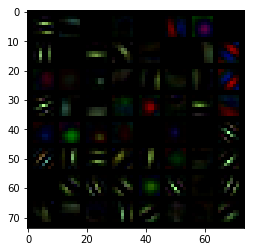

In [21]:
show(mapp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


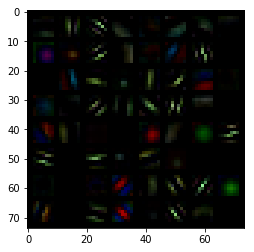

In [26]:
show(mapp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


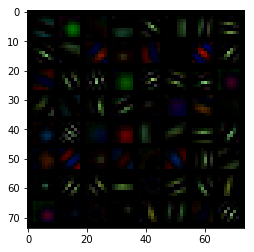

In [31]:
show(mapp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


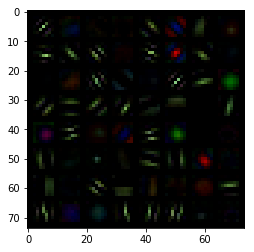

In [36]:
show(mapp)

In [56]:
import time
def benchmark(func):
    def wrapper(*args, **argv):
        #st_pref = time.pref_counter()
        st_proc = time.process_time()
        res = func(*args)
        #pref = time.pref_counter() - st_pref
        proc = time.process_time() - st_proc 
        return proc, res
    return wrapper

In [59]:
@benchmark
def foo():
    a = 0
    for i in range(100000):
        for j in range(10000000):
            a += 1
    return a

In [ ]:
foo()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


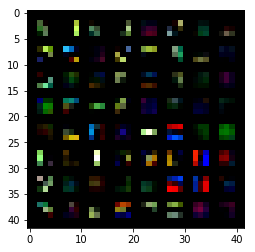

In [11]:
show(mapp)

In [15]:
first_conv_filters[1,:,:,]

tensor([[[-0.3528, -0.2549,  0.6734],
         [-0.6027, -0.3453,  0.8054],
         [-0.4197, -0.1347,  0.6622]],

        [[-0.5740, -0.3998,  0.7708],
         [-0.8758, -0.3668,  1.1098],
         [-0.5186, -0.0801,  0.9228]],

        [[-0.0280, -0.2954,  0.2159],
         [-0.1868, -0.2904,  0.3808],
         [-0.0926, -0.0766,  0.3727]]])